In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
def f(x,y):
    return x+2*y

In [3]:
def Solucion(x):
    return -0.5*x - (1-np.exp(2*x))/4.

In [4]:
N = 5
t = np.linspace(0,1,N)
t

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [5]:
h = t[1] - t[0]

In [6]:
yext = Solucion(t)

In [7]:
def fc(z):
    return 1j*z

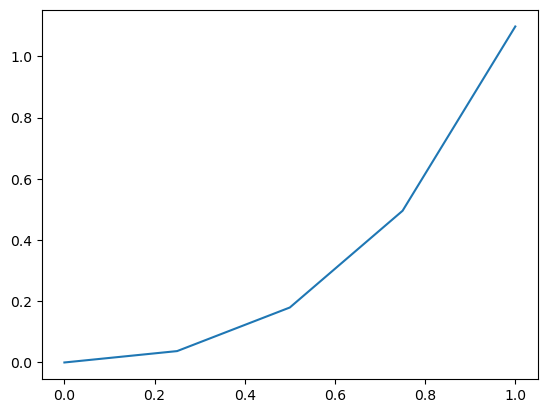

In [8]:
plt.plot(t,yext)

In [9]:
def GetEuler3(x,y,h):
    
    for i in range(1,len(x)):
        
        k1 = f(x[i-1],y[i-1])
        k2 = f(x[i-1]+0.5*h,y[i-1] + 0.5*h*k1)
        k3 = f(x[i-1]+h, y[i-1] - h*k1 +2*h*k2)
        
        y[i] = y[i-1] + (1/6)*h*(k1+4*k2+k3)

In [10]:
def GetEuler4(x,y,h):
    
    for i in range(1,len(x)):
        
        k1 = f(x[i-1],y[i-1])
        k2 = f(x[i-1]+0.5*h,y[i-1] + 0.5*h*k1)
        k3 = f(x[i-1]+0.5*h, y[i-1] + 0.5*h*k2)
        k4 = f(x[i-1]+h, y[i-1]+ h*k3)
        
        y[i] = y[i-1] + (1/6)*h*(k1+2*k2+2*k3+k4)

In [11]:
def f(x,y):
    return x + 2*y

In [12]:
y3 = np.zeros_like(t)
y3[0] = 0.
GetEuler3(t,y3,h)

In [13]:
y4 = np.zeros_like(t)
y4[0] = 0.
GetEuler4(t,y4,h)

In [14]:
def ComplexEuler3():
    global theta
    global h_
    global f
    
    theta += h_
    
    k1 = fc(f)
    k2 = fc(f+h_*k1)
    k3 = fc(f - h_*k1 +2*h_*k2)
    f += (1/6)*h_*(k1+4*k2+k3)

In [15]:
def ComplexEuler4():
    global theta
    global h_
    global f
    
    theta += h_
    
    k1 = fc(f)
    k2 = fc(f+0.5*h_*k1)
    k3 = fc( +0.5*h_*k2)
    k4 = fc(f +h_*k3)
    f += (1/6)*h_*(k1+2*k2+2*k3+k4)

In [27]:
theta = 0.

N = 100
Vueltas = 2

h_ = Vueltas * 2*np.pi/N

f = 1

Solucion3 = np.array([theta,f])

for i in range(N):
    ComplexEuler3()
    Solucion3 = np.vstack([Solucion3, np.array([theta,f])])

In [28]:
theta = 0.

N = 100
Vueltas = 2

h_ = Vueltas * 2*np.pi/N

f = 1

Solucion4 = np.array([theta,f])

for i in range(N):
    ComplexEuler4()
    Solucion4 = np.vstack([Solucion4, np.array([theta,f])])

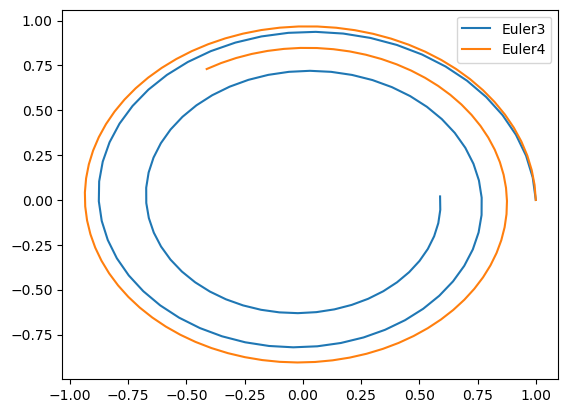

In [29]:
Re = np.real(Solucion3[:,1])
Im = np.imag(Solucion3[:,1])

Re2 = np.real(Solucion4[:,1])
Im2 = np.imag(Solucion4[:,1])


plt.plot(Re,Im, label='Euler3')
plt.plot(Re2,Im2, label='Euler4')
plt.legend()

Evaluando al estabilidad, se puede observar que los métodos de orden 3 y 4 forman una espiral hacia adentro, lo cual quiere decir que son metodos inestables que oscilan alrededor del valor Real.

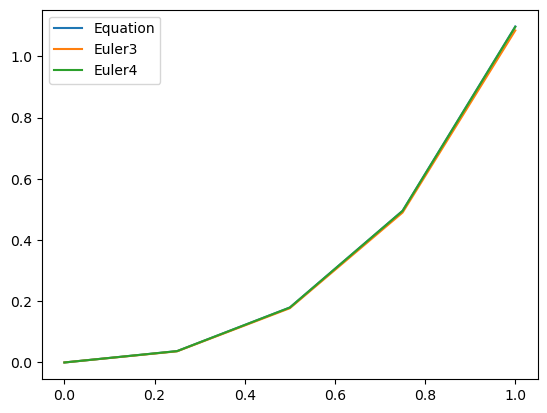

In [30]:
plt.plot(t,yext, label= 'Equation')
plt.plot(t,y3,label='Euler3')
plt.plot(t,y4,label='Euler4')
plt.legend()